In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
# Opening population data
df_pop = pd.read_csv('../20_intermediate_files/state county population.csv', index_col=None)
df_pop = df_pop.drop('Year Code', axis = 1)
df_pop['state_code'] = df_pop["County"].str[-2:]
df_pop['county_name_only'] = df_pop["County"].str[:-11]
df_pop.head(2)

,State,State Code,County,County Code,Year,Population,state_code,county_name_only
0,Alabama,1,"Autauga County, AL",1001,1999,42963,AL,Autauga
1,Alabama,1,"Autauga County, AL",1001,2000,43671,AL,Autauga


In [3]:
df_pop.shape

(68423, 8)

In [4]:
# Filtering only the states we are interested in
abbrv = ['CA','NV','NY','TX','HI','IA','KS','ME','MA','MN','MT','NE','ND','OR','SD','VA','WY','AR','GA','MS', 'FL', 'WA']
df_pop = df_pop.loc[df_pop['state_code'].isin(abbrv),:]
df_pop.shape

(34633, 8)

In [5]:
# Random checking to make sure we have the states
(df_pop['State']=='Washington').value_counts()

False    33775
True       858
Name: State, dtype: int64

In [6]:
# Opening perscription data
df_pres = pd.read_csv('../20_intermediate_files/prescription_data_grouped_1.csv')
df_pres.head(2)


,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
0,AR,ACCOMACK,2006,0.0
1,AR,ACCOMACK,2007,0.0


In [7]:
# Checking assumption that our data has duplicates
df_pres.loc[(df_pres['T_YEAR']==2006) & (df_pres['BUYER_COUNTY']=='ACCOMACK'),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,MME
0,AR,ACCOMACK,2006,0.000000
9864,CA,ACCOMACK,2006,0.000000
19728,FL,ACCOMACK,2006,0.000000
29592,GA,ACCOMACK,2006,0.000000
39456,HI,ACCOMACK,2006,0.000000
49320,IA,ACCOMACK,2006,0.000000
59184,KS,ACCOMACK,2006,0.000000
69048,MA,ACCOMACK,2006,0.000000
78912,ME,ACCOMACK,2006,0.000000
88776,MN,ACCOMACK,2006,0.000000


> Apparently there are some counties that don't belong to the states, so I will clean the shipment data, merge it with population, and then distribute it for you guys to calculate the descriptive statistics

In [84]:
# Changing the name of the year column to match the population data
# df_pres = df_pres.rename(columns={'Year':'T_YEAR'})

In [14]:
df_pres["T_YEAR"].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014], dtype=int64)

In [8]:
# Dropping unnecessary columns
df_pop = df_pop.drop(["State Code", "County", 'County Code'], axis=1)

In [16]:
df_pop.head(2)

,State,Year,Population,state_code,county_name_only
2422,Arkansas,1999,20966,AR,Arkansas
2423,Arkansas,2000,20749,AR,Arkansas


In [9]:
# Filtering year and lowercase county name
df_pop = df_pop.loc[(df_pop['Year']>=2009) & (df_pop['Year']<=2014)]
df_pop['county_name_only'] = df_pop['county_name_only'].str.lower()


In [10]:
# Creating filter column for population df
df_pop_grouped = df_pop.groupby(['Year', 'State', 'state_code', 'county_name_only']).sum().reset_index()
df_pop_grouped['county_name_only'] = df_pop_grouped['county_name_only'].str.lower()
df_pop_grouped['Year_string'] = df_pop_grouped['Year'].astype('str')
df_pop_grouped['filter'] = df_pop_grouped['state_code'] + df_pop_grouped['county_name_only'] + df_pop_grouped['Year_string']
df_pop_grouped

,Year,State,state_code,county_name_only,Population,Year_string,filter
0,2009,Arkansas,AR,arkansas,19134,2009,ARarkansas2009
1,2009,Arkansas,AR,ashley,21920,2009,ARashley2009
2,2009,Arkansas,AR,baxter,41561,2009,ARbaxter2009
3,2009,Arkansas,AR,benton,216620,2009,ARbenton2009
4,2009,Arkansas,AR,boone,36844,2009,ARboone2009
...,...,...,...,...,...,...,...
9441,2014,Wyoming,WY,sweetwater,45010,2014,WYsweetwater2014
9442,2014,Wyoming,WY,teton,22930,2014,WYteton2014
9443,2014,Wyoming,WY,uinta,20904,2014,WYuinta2014
9444,2014,Wyoming,WY,washakie,8322,2014,WYwashakie2014


In [11]:
# Filtering year and lowercase county name for shipment data
df_pres = df_pres.loc[(df_pres['T_YEAR']>=2009) & (df_pres['T_YEAR']<=2014)]
df_pres['county_name_only'] = df_pres['BUYER_COUNTY'].str.lower()

In [12]:
# Grouping prescription df to avoid duplicate state and county name
df_pres_grouped = df_pres.groupby(['BUYER_STATE', 'BUYER_COUNTY', 'T_YEAR', 'county_name_only']).sum().reset_index()

# Creating filter column for population df
df_pres_grouped['Year'] = df_pres_grouped['T_YEAR'].astype('str')
df_pres_grouped['filter'] = df_pres_grouped['BUYER_STATE'] + df_pres_grouped['county_name_only'] + df_pres_grouped['Year']
df_pres_grouped


,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
0,AR,ACCOMACK,2009,accomack,0.0,2009,ARaccomack2009
1,AR,ACCOMACK,2010,accomack,0.0,2010,ARaccomack2010
2,AR,ACCOMACK,2011,accomack,0.0,2011,ARaccomack2011
3,AR,ACCOMACK,2012,accomack,0.0,2012,ARaccomack2012
4,AR,ACCOMACK,2013,accomack,0.0,2013,ARaccomack2013
...,...,...,...,...,...,...,...
144667,WY,ZAVALA,2010,zavala,0.0,2010,WYzavala2010
144668,WY,ZAVALA,2011,zavala,0.0,2011,WYzavala2011
144669,WY,ZAVALA,2012,zavala,0.0,2012,WYzavala2012
144670,WY,ZAVALA,2013,zavala,0.0,2013,WYzavala2013


In [13]:
# filtering the data to only county and state exist in population data
df_pres_grouped.loc[df_pres_grouped['filter'].isin(df_pop_grouped['filter']),:]

,BUYER_STATE,BUYER_COUNTY,T_YEAR,county_name_only,MME,Year,filter
180,AR,ARKANSAS,2009,arkansas,6643.993312,2009,ARarkansas2009
181,AR,ARKANSAS,2010,arkansas,7564.533495,2010,ARarkansas2010
182,AR,ARKANSAS,2011,arkansas,7502.461643,2011,ARarkansas2011
183,AR,ARKANSAS,2012,arkansas,8032.757680,2012,ARarkansas2012
184,AR,ARKANSAS,2013,arkansas,7333.509152,2013,ARarkansas2013
...,...,...,...,...,...,...,...
144361,WY,WESTON,2010,weston,2074.412212,2010,WYweston2010
144362,WY,WESTON,2011,weston,2103.821850,2011,WYweston2011
144363,WY,WESTON,2012,weston,2062.901850,2012,WYweston2012
144364,WY,WESTON,2013,weston,2008.627804,2013,WYweston2013


In [14]:
# dropping unnecessary columns
df_pop_grouped = df_pop_grouped.drop(['Year_string', 'filter'], axis=1)
df_pres_grouped = df_pres_grouped.drop(['Year', 'filter'], axis=1)

In [15]:
# Merge both dataframe into merged_df
merged_df = df_pop_grouped.merge(df_pres_grouped, left_on=["Year","state_code","county_name_only"], right_on=["T_YEAR","BUYER_STATE","county_name_only"])
# merged_df = merged_df.drop(["BUYER_STATE", "BUYER_COUNTY", "Year"], axis=1)

In [16]:
merged_df.dtypes

Year                  int64
State                object
state_code           object
county_name_only     object
Population           object
BUYER_STATE          object
BUYER_COUNTY         object
T_YEAR                int64
MME                 float64
dtype: object

In [17]:
merged_df['Population'] = merged_df.Population.astype('int')

In [20]:
# defining control states
we_want_wa = ['Hawaii', 'Iowa', 'Kansas', 'Maine', 'Massachusetts',
       'Minnesota', 'Montana', 'Nebraska', 'North Dakota', 'Oregon',
       'South Dakota', 'Virginia', 'Wyoming']

df_wa_control = merged_df[merged_df['State'].isin(we_want_wa)]

groupedby_df_wa_control = df_wa_control.groupby(["Year",'BUYER_STATE','BUYER_COUNTY']).sum().reset_index()
groupedby_df_wa_control['Status'] = 'Control'

In [21]:
groupedby_df_wa_control

,Year,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME,Status
0,2009,HI,HAWAII,183629,2009,70120.249951,Control
1,2009,HI,HONOLULU,943177,2009,142647.388839,Control
2,2009,HI,KAUAI,66518,2009,44348.058012,Control
3,2009,HI,MAUI,153300,2009,93640.833898,Control
4,2009,IA,ADAIR,7676,2009,1373.040080,Control
...,...,...,...,...,...,...,...
4242,2014,WY,SWEETWATER,45010,2014,23906.007735,Control
4243,2014,WY,TETON,22930,2014,3435.514794,Control
4244,2014,WY,UINTA,20904,2014,11152.284428,Control
4245,2014,WY,WASHAKIE,8322,2014,7433.758013,Control


In [22]:
# defining policy states
we_want_only_wa= ['Washington']

df_wa_only = merged_df[merged_df['State'].isin(we_want_only_wa)]

groupedby_df_wa_only = df_wa_only.groupby(["Year",'BUYER_STATE','BUYER_COUNTY']).sum().reset_index()
groupedby_df_wa_only['Status'] = 'Policy'

In [23]:
groupedby_df_wa_only

,Year,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME,Status
0,2009,WA,ADAMS,18405,2009,3836.773950,Policy
1,2009,WA,ASOTIN,21415,2009,9136.063605,Policy
2,2009,WA,BENTON,171122,2009,56739.019412,Policy
3,2009,WA,CHELAN,71679,2009,24818.139466,Policy
4,2009,WA,CLALLAM,71077,2009,52228.389902,Policy
...,...,...,...,...,...,...,...
229,2014,WA,WAHKIAKUM,4067,2014,980.341387,Policy
230,2014,WA,WALLA WALLA,59844,2014,24190.273178,Policy
231,2014,WA,WHATCOM,208351,2014,51611.925203,Policy
232,2014,WA,WHITMAN,46827,2014,9868.778663,Policy


In [24]:
# concat both dataframes
groupedby_df_wa = pd.concat([groupedby_df_wa_control, groupedby_df_wa_only], axis=0)
groupedby_df_wa['Prescription_Rate'] = (groupedby_df_wa['MME']/groupedby_df_wa['Population'])*100_000
groupedby_df_wa

,Year,BUYER_STATE,BUYER_COUNTY,Population,T_YEAR,MME,Status,Prescription_Rate
0,2009,HI,HAWAII,183629,2009,70120.249951,Control,38185.825742
1,2009,HI,HONOLULU,943177,2009,142647.388839,Control,15124.137764
2,2009,HI,KAUAI,66518,2009,44348.058012,Control,66670.762818
3,2009,HI,MAUI,153300,2009,93640.833898,Control,61083.388061
4,2009,IA,ADAIR,7676,2009,1373.040080,Control,17887.442418
...,...,...,...,...,...,...,...,...
229,2014,WA,WAHKIAKUM,4067,2014,980.341387,Policy,24104.779629
230,2014,WA,WALLA WALLA,59844,2014,24190.273178,Policy,40422.219735
231,2014,WA,WHATCOM,208351,2014,51611.925203,Policy,24771.623464
232,2014,WA,WHITMAN,46827,2014,9868.778663,Policy,21074.975255


In [27]:
wa_policy_pre = groupedby_df_wa.loc[(groupedby_df_wa['Status']=='Policy') & (groupedby_df_wa["T_YEAR"]<2012),:]
wa_policy_post = groupedby_df_wa.loc[(groupedby_df_wa['Status']=='Policy') & (groupedby_df_wa["T_YEAR"]>=2012),:]

wa_control_pre = groupedby_df_wa.loc[(groupedby_df_wa['Status']=='Control') & (groupedby_df_wa["T_YEAR"]<2012),:]
wa_control_post = groupedby_df_wa.loc[(groupedby_df_wa['Status']=='Control') & (groupedby_df_wa["T_YEAR"]>=2012),:]


In [60]:
# making a csv on state level from df_florida - for descriptive statistics so for plot, just ignore this block
# group by the df_florida based on year, state
df_wa_control = merged_df[merged_df['State'].isin(we_want_wa)]
df_wa_comparison_grouped = df_wa_control.groupby(['Year', 'State','BUYER_STATE','BUYER_COUNTY']).sum().reset_index()

# Grouping treatment state
df_wa_only_grouped = merged_df[merged_df['State'].isin(we_want_only_wa)]
df_wa_only_grouped = df_wa_only_grouped.groupby(['Year', 'State','BUYER_STATE','BUYER_COUNTY']).sum().reset_index()

# Making a csv file for descriptive statistics
df_wa_comparison_grouped.to_csv('../20_intermediate_files/df_wa_comparison_grouped.csv', index=False)
df_wa_only_grouped.to_csv('../20_intermediate_files/df_wa_only_grouped.csv', index=False)


In [28]:
# function to make ggplot for Florida
def diffIndiff_fl(
    prepolicy_contr,
    postpolicy_contr,
    prepolicy_treatment,
    postpolicy_treatment,
    xvar,
    yvar,
    policyyear,
):
    dd = (
        ggplot()
        # plot all chosen states,  pre policy year
        + geom_smooth(
            prepolicy_contr,
            aes(x=xvar, y=yvar, color="Status"),
            method="lm",
        )
        # plot all chosen states, post policy year
        + geom_smooth(
            postpolicy_contr,
            aes(x=xvar, y=yvar, color="Status"),
            method="lm",
        )
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar, color="Status"),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar, color="Status"),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return dd

def pre_post_fl(prepolicy_treatment, postpolicy_treatment, xvar, yvar, policyyear):
    ppo = (
        ggplot()
        # plot treatment, pre policy year
        + geom_smooth(
            prepolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        # plot treatment, post policy year
        + geom_smooth(
            postpolicy_treatment,
            aes(x=xvar, y=yvar),
            method="lm",
        )
        + geom_vline(xintercept=policyyear, linetype="dotted")
        + xlab("Year")
        +scale_color_manual(values=["darkturquoise","darkturquoise"])
        # + theme_classic(base_family="Times")
        + scale_x_continuous(breaks=[2009, 2010, 2011, 2012, 2013, 2014], limits=[2009, 2014])
    )
    return ppo

c:\Users\wafia\miniconda3\lib\site-packages\plotnine\guides\guides.py:187: PlotnineWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it


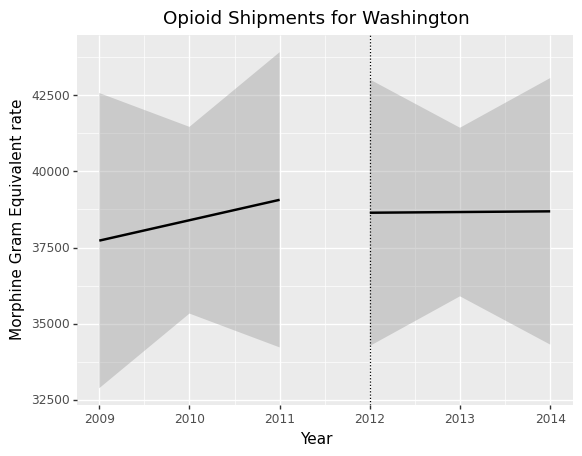

In [29]:
prepos = (
    pre_post_fl(wa_policy_pre, wa_policy_post, "Year", "Prescription_Rate", 2012)
    + labs(
        title="Opioid Shipments for Washington"
    )
    + ylab("Morphine Gram Equivalent rate")
)

print(prepos)

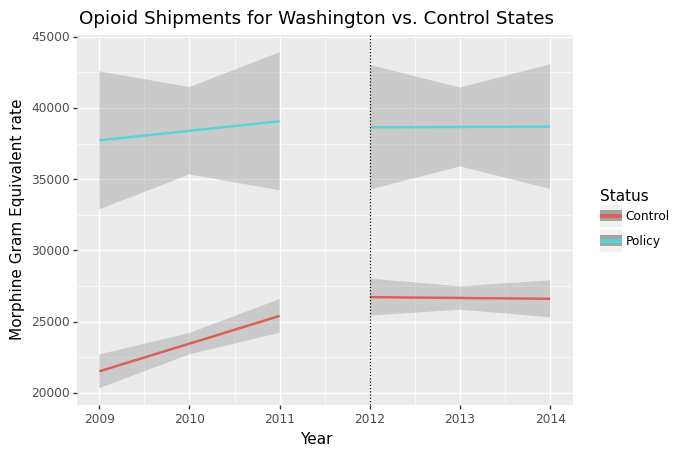

In [30]:
# This is the new diff in diff plot
diff = (
    diffIndiff_fl(
        wa_control_pre, wa_control_post, wa_policy_pre, wa_policy_post, "Year", "Prescription_Rate", 2012
    )
    + labs(
        title="Opioid Shipments for Washington vs. Control States",
        color="Status",
    )
    + ylab("Morphine Gram Equivalent rate")
    + theme(legend_position="right")
)
print(diff)

# Using Altair

In [31]:
import altair as alt
import statsmodels.formula.api as smf

In [32]:
def reg_fit(data, color, yvar, xvar, legend, alpha=0.05):
    colour = color
    years = list(np.arange(2003, 2016, 1))
    x = data.loc[pd.notnull(data[yvar]), xvar]
    xmin = x.min()
    xmax = x.max()
    step = (xmax - xmin) / 100
    grid = np.arange(xmin, xmax + step, step)
    predictions = pd.DataFrame({xvar: grid})

    # Fit model
    model = smf.ols(f"{yvar} ~ {xvar}", data=data).fit()
    model_predict = model.get_prediction(predictions[xvar])
    predictions[yvar] = model_predict.summary_frame()["mean"]
    predictions[["ci_low", "ci_high"]] = model_predict.conf_int(alpha=alpha)
    
    # Build chart
    predictions["Treat"] = f"{legend}"
    reg = (
        alt.Chart(predictions)
        .mark_line()
        .encode(
            x=xvar,
            y=alt.Y(yvar),
            color=alt.value(f"{colour}"),
            opacity=alt.Opacity("Treat", legend=alt.Legend(title="Legend")),
        )
    )
    ci = (
        alt.Chart(predictions)
        .mark_errorband()
        .encode(
            alt.X(f"{xvar}:Q", axis=alt.Axis(format=".0f", values=years)),
            y=alt.Y(
                "ci_low",
                title="Mortality Rate per 100000 due to Opioid Overdose (by County)",
                scale=alt.Scale(zero=False),
            ),
            y2="ci_high",
            color=alt.value(f"{color}"),
        )
    )
    chart = ci + reg
    return predictions, chart

def plotting_chart(policy_year, color, data, yvar, xvar, legend, alpha=0.05):
    pl_year = policy_year
    pol_year = []
    pol_year.append(int(pl_year))
    years = list(np.arange(2003, 2016, 1))

    # Plot chart
    fit, reg_chart = reg_fit(
        color=color, data=data, yvar=yvar, xvar=xvar, legend=legend, alpha=alpha
    )
    policy = pd.DataFrame({"Year": pol_year})

    rule = (
        alt.Chart(policy)
        .mark_rule(color="black")
        .encode(alt.X("Year:Q", title="Year", axis=alt.Axis(values=years)))
    )
    return (reg_chart + rule).properties(width=500, height=500)

In [33]:
# FL plot
pre_fl_fit = plotting_chart(
    2012, "blue", wa_policy_pre, "Prescription_Rate", "Year", legend="Washington", alpha=0.05
)
post_fl_fit = plotting_chart(
    2012, "blue", wa_policy_post, "Prescription_Rate", "Year", legend="Washington", alpha=0.05
)
final = pre_fl_fit + post_fl_fit

final.properties(
    title="Pre-Policy VS. Post-Policy of Opioid Regulations on Mortality Rate for Washington"
)

alt.LayerChart(...)

In [34]:
pre_FL = plotting_chart(
    2012, "blue", wa_policy_pre, "Prescription_Rate", "Year", "Washington", alpha=0.05
)
post_FL = plotting_chart(
    2012, "blue", wa_policy_post, "Prescription_Rate", "Year", "Washington", alpha=0.05
)
pre_control = plotting_chart(
    2012,
    "red",
    wa_control_pre,
    "Prescription_Rate",
    "Year",
    "Comparison States",
    alpha=0.05,
)
post_control = plotting_chart(
    2012,
    "red",
    wa_control_post,
    "Prescription_Rate",
    "Year",
    "Comparison States",
    alpha=0.05,
)

# FL vs MI, NC, OH
final = pre_FL + post_FL + pre_control + post_control
final.properties(
    title="Difference in Difference Analysis of Opioid Regulations on Mortality Rate for Washington vs Comparison States"
)

alt.LayerChart(...)